# Telecom project
#### Research for telecom operator Megaline

The goal is to determine which of two prepaid plans brings in more revenue in order to adjust the advertising budget.
I am aiming to carry out a preliminary analysis of the plans based on a relatively small client selection. 

#### Additional info
Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Plan "Surf"
- Monthly charge: 20
- 500 monthly minutes, 50 texts, and 15 GB of data\
After exceeding the package limits:
- 1 minute: 3 cents
- 1 text message: 3 cents
- 1 GB of data: 10

Plan "Ultimate"
- Monthly charge: 70
- 3000 monthly minutes, 1000 text messages, and 30 GB of data\
After exceeding the package limits:
- 1 minute: 1 cent
- 1 text message: 1 cent
- 1 GB of data: 7

## Content plan

1. [Step1](#Step1) Opening the data file and studing the general information
2. [Step2](#Step2) Preparing the data
3. [Step3](#Step3) Analysing the data
4. [Step4](#Step4) Testing statistical hypothesis 
5. [Overall conclusion](#oc)

### Step1

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [139]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [140]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [141]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [142]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [143]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [144]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [145]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [146]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In all tables, it will be necessary to change the data type for dates to datetime. In the table "calls" there's a duration of 0, just like in the internet table, there are 0 megabytes in sessions, this will require attention during data preprocessing.

### Step2

The minimum call duration is 0 minutes. Let's look at the chart.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778728ddd0>]],
      dtype=object)

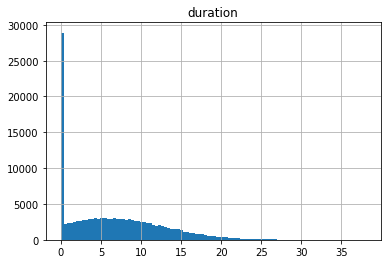

In [147]:
calls.hist('duration', bins=100, range=(0, 38))

The graph shows a peak of zero values, while the average duration is 5-8 minutes.

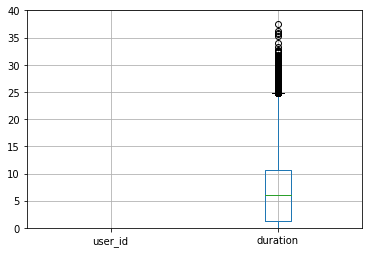

In [148]:
plt.ylim(0, 40)
calls.boxplot()

Mostly calls last from 1.5 to 11 minutes. It can be assumed that calls with a zero value lasted less than a minute, perhaps only 5-10 seconds, when only a couple of words were said, or the connection was interrupted. As we know, the operator writes off a minute, even if the conversation lasted less, so it is justified to replace 0 with 1, and round all values to an integer upward.

In [149]:
calls['duration'] = calls['duration'].replace(0, 1)
calls['duration'] = np.ceil(calls['duration'])
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.341496
std,139.416268,5.728989
min,1000.000000,1.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


Now I will make a Month column and group the table by user_name and month, calculate how many calls each user made in each month and how long they lasted.

In [150]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


In [151]:
calls_grouped = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
calls_grouped.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_grouped.head()

,user_id,month,calls_count,calls_sum
0,1000,12,16,124.0
1,1001,8,27,187.0
2,1001,9,49,326.0
3,1001,10,65,411.0
4,1001,11,64,441.0


Now I will prepare the data in the remaining tables so that I can then combine them into one and calculate the profit.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7787047d90>]],
      dtype=object)

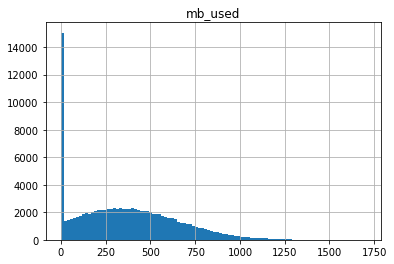

In [152]:
internet.hist('mb_used',bins=100, range=(0, 1700))

In [153]:
internet.query('mb_used == 0.00').shape[0]

13747

A significant number of zero sessions, most likely they used less than 1 MB of traffic, nevertheless, as in the case of calls, the operator will count them as 1 MB. The operator counts the used traffic for the entire month, so first I will replace 0 with 1, then I will group the table and calculate the number of megabytes for each user per month, convert it to GB, and round up to a whole number.

In [154]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)

In [155]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,1.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [156]:
int_grouped = internet.groupby(['user_id', 'month'])['mb_used'].agg('sum').reset_index()
int_grouped.columns = ['user_id', 'month', 'mb_used']
int_grouped['gb_used'] = int_grouped['mb_used'] / 1024
int_grouped['gb_used'] = np.ceil(int_grouped['gb_used'])
int_grouped.head()

,user_id,month,mb_used,gb_used
0,1000,12,1902.47,2.0
1,1001,8,6923.15,7.0
2,1001,9,13327.82,14.0
3,1001,10,22338.49,22.0
4,1001,11,18507.30,19.0


In [157]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [158]:
mes_grouped = messages.groupby(['user_id', 'month'])['id'].agg('count').reset_index()
mes_grouped.columns = ['user_id', 'month', 'mes_count']
mes_grouped.head()

,user_id,month,mes_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


I will combine the tables into one, filling the appearing empty columns with zeros.

In [159]:
from functools import reduce
data_frames = [calls_grouped, int_grouped, mes_grouped]
data_merged = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames).fillna(0)
data_merged.head()

,user_id,month,calls_count,calls_sum,mb_used,gb_used,mes_count
0,1000,12,16.0,124.0,1902.47,2.0,11.0
1,1001,8,27.0,187.0,6923.15,7.0,30.0
2,1001,9,49.0,326.0,13327.82,14.0,44.0
3,1001,10,65.0,411.0,22338.49,22.0,53.0
4,1001,11,64.0,441.0,18507.30,19.0,36.0


Now we need to add a tariff plan for each user.

In [160]:
users_plan = users[['user_id','plan']]
users_plan.head()

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


In [161]:
data = data_merged.merge(users_plan, on='user_id')
data.head()

,user_id,month,calls_count,calls_sum,mb_used,gb_used,mes_count,plan
0,1000,12,16.0,124.0,1902.47,2.0,11.0,ultimate
1,1001,8,27.0,187.0,6923.15,7.0,30.0,surf
2,1001,9,49.0,326.0,13327.82,14.0,44.0,surf
3,1001,10,65.0,411.0,22338.49,22.0,53.0,surf
4,1001,11,64.0,441.0,18507.30,19.0,36.0,surf


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
user_id        2293 non-null int64
month          2293 non-null int64
calls_count    2293 non-null float64
calls_sum      2293 non-null float64
mb_used        2293 non-null float64
gb_used        2293 non-null float64
mes_count      2293 non-null float64
plan           2293 non-null object
dtypes: float64(5), int64(2), object(1)
memory usage: 161.2+ KB


Based on the received table, we will calculate the monthly profit from each client.

In [163]:
def user_profit(row):
    
    tariff = row['plan']
    call = row['calls_sum']
    message = row['mes_count']
    intern = row['gb_used']
    
    if tariff == 'ultimate':
        tariff_cost = 70
        
        if call > 3000:
            call_cost = (call-3000) * 0.01
        else:
            call_cost = 0
        
        if message > 1000:
            message_cost = (message - 1000) * 0.01
        else:
            message_cost = 0
            
        if intern > 30:
            intern_cost = (intern - 30) * 7
        else:
            intern_cost = 0
            
    if tariff == 'surf':
        tariff_cost = 20
        
        if call > 500:
            call_cost = (call-500) * 0.03
        else:
            call_cost = 0
        
        if message > 50:
            message_cost = (message - 50) * 0.03
        else:
            message_cost = 0
            
        if intern > 15:
            intern_cost = (intern - 15) * 10
        else:
            intern_cost = 0       
            
    total_cost = tariff_cost + call_cost + message_cost + intern_cost
    return total_cost

data['total_cost'] = data.apply(user_profit, axis=1)
data.head()

,user_id,month,calls_count,calls_sum,mb_used,gb_used,mes_count,plan,total_cost
0,1000,12,16.0,124.0,1902.47,2.0,11.0,ultimate,70.00
1,1001,8,27.0,187.0,6923.15,7.0,30.0,surf,20.00
2,1001,9,49.0,326.0,13327.82,14.0,44.0,surf,20.00
3,1001,10,65.0,411.0,22338.49,22.0,53.0,surf,90.09
4,1001,11,64.0,441.0,18507.30,19.0,36.0,surf,60.00


Let's see how much users of different tariffs spend on average per month, as well as how much money the operator receives from different tariffs every month.

In [164]:
data_profit = data.pivot_table(index='month', columns='plan', values='total_cost', aggfunc=('sum', 'median', 'mean'))
data_profit

mean             median                sum         
plan        surf   ultimate    surf ultimate      surf ultimate
month                                                          
1      20.000000  70.000000  20.000     70.0     40.00    280.0
2      34.456667  70.000000  30.000     70.0    310.11    490.0
3      45.996087  74.666667  20.000     70.0   1057.91    896.0
4      40.832400  73.000000  20.000     70.0   2041.62   1533.0
5      47.834286  70.724138  22.340     70.0   3683.24   2051.0
6      49.455052  71.638298  30.450     70.0   4797.14   3367.0
7      63.069917  71.898305  40.330     70.0   7631.46   4242.0
8      64.118765  72.859155  42.190     70.0  10387.24   5173.0
9      58.444845  72.034884  40.375     70.0  11338.30   6195.0
10     65.702447  72.311321  50.000     70.0  15571.48   7665.0
11     58.220883  71.708661  40.000     70.0  16476.51   9107.0
12     70.815094  73.291391  50.000     70.0  22519.20  11067.0

I will clarify how many customers are on each tariff.

In [165]:
data_users = users.groupby('plan')['user_id'].count()
data_users

plan
surf        339
ultimate    161
Name: user_id, dtype: int64

### Conclusion

There are twice as many customers on the "Surf" tariff, perhaps this is due to the fact that people initially chose the more budgetary option. But spending per month shows that while some "Ultimate" users, on average, slightly exceed the limits and pay extra, many "Surf" customers pay twice, and sometimes three times the monthly fee. For them, the packages included in the tariff are clearly not enough. 

### Step3

Let's see on which of the tariffs customers talk more on the phone.

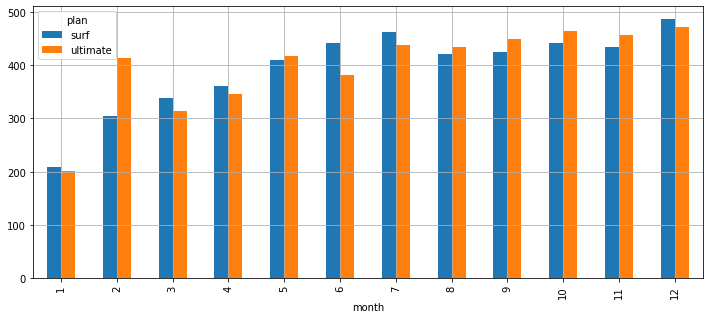

In [166]:
(data
 .pivot_table(index='month', columns='plan', values='calls_sum', aggfunc='mean')
 .plot(grid=True, kind='bar', figsize=(12, 5)))

Let's also compare the number of SMS and traffic.

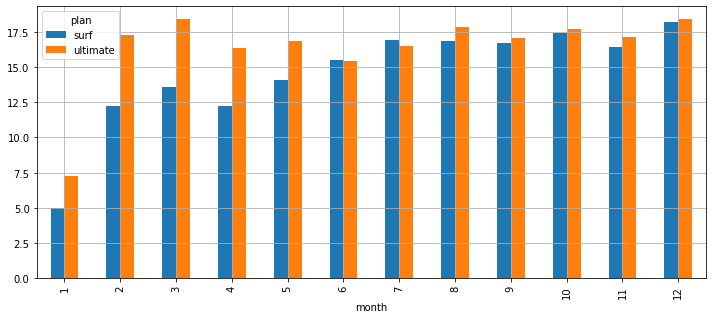

In [167]:
(data
 .pivot_table(index='month', columns='plan', values='gb_used', aggfunc='mean')
 .plot(grid=True, kind='bar', figsize=(12, 5)))

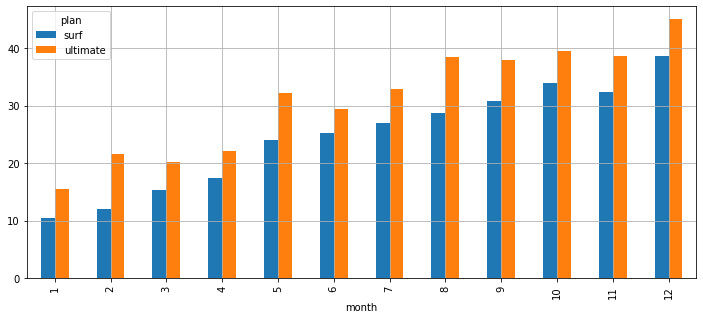

In [168]:
(data
 .pivot_table(index='month', columns='plan', values='mes_count', aggfunc='mean')
 .plot(grid=True, kind='bar', figsize=(12, 5)))

The graphs confirm the results we obtained earlier:
- "Ultimate" clients send significantly more SMS, which is quite expected based on the terms of their tariff
- "Surf" customers spend slightly less traffic than users of the second tariff, although their package includes half the GB
- regarding calls, statistics show that the leader among tariffs changes from month to month, although the number of included minutes differs by 6 times.
- All three charts show that throughout the year the number of minutes, SMS and traffic that customers used has increased.

In [169]:
data_messages = data.groupby('plan')['mes_count'].mean()
data_messages

plan
surf        31.159568
ultimate    37.551389
Name: mes_count, dtype: float64

In [170]:
data_calls = data.groupby('plan')['calls_sum'].mean()
data_calls

plan
surf        440.324221
ultimate    442.431944
Name: calls_sum, dtype: float64

In [171]:
data_internet = data.groupby('plan')['gb_used'].mean()
data_internet

plan
surf        16.677050
ultimate    17.318056
Name: gb_used, dtype: float64

In [172]:
data_surf = data.query('plan == "surf"')
data_surf.head()

,user_id,month,calls_count,calls_sum,mb_used,gb_used,mes_count,plan,total_cost
1,1001,8,27.0,187.0,6923.15,7.0,30.0,surf,20.00
2,1001,9,49.0,326.0,13327.82,14.0,44.0,surf,20.00
3,1001,10,65.0,411.0,22338.49,22.0,53.0,surf,90.09
4,1001,11,64.0,441.0,18507.30,19.0,36.0,surf,60.00
5,1001,12,56.0,422.0,19376.18,19.0,44.0,surf,60.00


In [173]:
surf_calls_var = np.var(data_surf['calls_sum'])
surf_calls_var

57707.03664791546

In [174]:
surf_calls_std = np.sqrt(surf_calls_var)
surf_calls_std

240.22288951703888

In [175]:
surf_mes_var = np.var(data_surf['mes_count'])
surf_mes_var

1126.008231726662

In [176]:
surf_mes_std = np.sqrt(surf_mes_var)
surf_mes_std

33.556046127734746

In [177]:
surf_inet_var = np.var(data_surf['gb_used'])
surf_inet_var

61.5791109428051

In [178]:
surf_inet_std = np.sqrt(surf_inet_var)
surf_inet_std

7.847235879136367

In [179]:
data_ult = data.query('plan == "ultimate"')
data_ult.head()

,user_id,month,calls_count,calls_sum,mb_used,gb_used,mes_count,plan,total_cost
0,1000,12,16.0,124.0,1902.47,2.0,11.0,ultimate,70.0
19,1006,11,2.0,10.0,2068.37,3.0,15.0,ultimate,70.0
20,1006,12,9.0,61.0,32121.82,32.0,139.0,ultimate,84.0
26,1008,10,71.0,493.0,17115.99,17.0,21.0,ultimate,70.0
27,1008,11,63.0,459.0,23693.72,24.0,37.0,ultimate,70.0


In [180]:
ult_calls_var = np.var(data_ult['calls_sum'])
ult_calls_var

60791.46203510802

In [181]:
ult_calls_std = np.sqrt(ult_calls_var)
ult_calls_std

246.55924650093337

In [182]:
ult_mes_var = np.var(data_ult['mes_count'])
ult_mes_var

1207.0779147376543

In [183]:
ult_mes_std = np.sqrt(ult_mes_var)
ult_mes_std

34.743026850544474

In [184]:
ult_inet_var = np.var(data_ult['gb_used'])
ult_inet_var

58.78356288580247

In [185]:
ult_inet_std = np.sqrt(ult_inet_var)
ult_inet_std

7.667043947037376

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7786bda790>]],
      dtype=object)

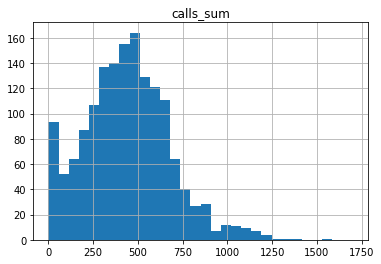

In [186]:
data_surf.hist('calls_sum', bins=30, grid=True, range=(0, 1700))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7786b72490>]],
      dtype=object)

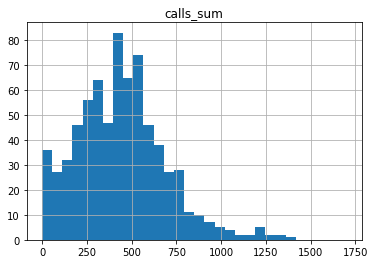

In [187]:
data_ult.hist('calls_sum', bins=30, grid=True, range=(0, 1700))


If we compare the two tariffs, it becomes obvious that "Ultimate" users do not completely reach the limit on the number of minutes, they mostly use up to 800 minutes a month, with the exception of rare fans of chatting or, perhaps, working on a mobile phone. At the same time, many "Surf" users spend 1.5 times more minutes than they have in their tariff.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7786a7fdd0>]],
      dtype=object)

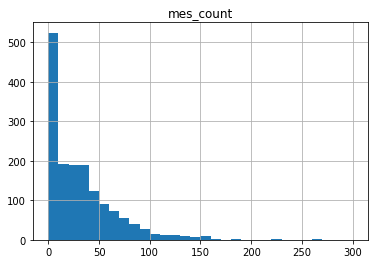

In [188]:
data_surf.hist('mes_count', bins=30, grid=True, range=(0, 300))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778699d390>]],
      dtype=object)

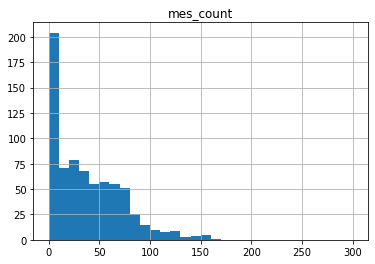

In [189]:
data_ult.hist('mes_count', bins=30, grid=True, range=(0, 300))

If we compare the number of messages sent by users, then the behavior of clients of different tariffs is almost the same: many practically do not use this service, most customers use less then 150 messages per month. So "Ultimate" clients do not even reach 1/5 of the number of SMS included in the tariff, while some "Surf" clients overuse their limit.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7786a71d90>]],
      dtype=object)

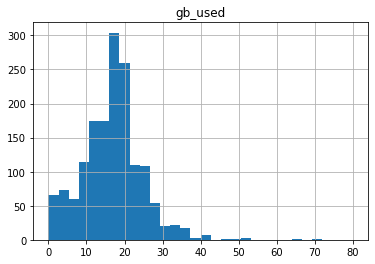

In [190]:
data_surf.hist('gb_used', bins=30, grid=True, range=(0, 80))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77869f47d0>]],
      dtype=object)

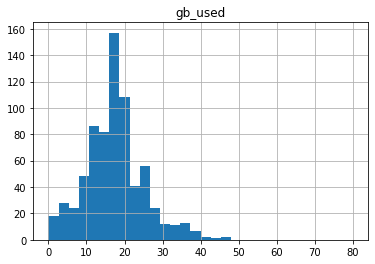

In [191]:
data_ult.hist('gb_used', bins=30, grid=True, range=(0, 80))

The trend continues with respect to the use of the Internet, only a small part of "Ultimate" clients overspend the limit included in the tariff, most people use up to 20 GB. "Surf" customers also spend the same amount of GB, and they again overdraft on the packages included in the tariff.

### Conclusion

We got the following results:

- It is rare for "Ultimate" customers to overspend their included limits, while many "Surf" customers exceed them.
- We can say that the optimal number of minutes per month, which may be relevant for customers, is 1000 minutes, the number of messages is 150, the amount of traffic is 20 GB.


### Step4

We have two hypotheses:
- The average profit from users of "Ultimate" and "Surf" calling plans differs
- The average profit from users in NY-NJ area is different from that of the users from other regions

Let's test them. I'll start with the first one.

Let's formulate null hypothesis H₀ and alternative hypothesis, H₁.
H₀: The average profit from users of Ultimate and Surf calling plans are equal
H₁: The average profit from users of Ultimate and Surf calling plans differs

Let's test the hypothesis.
Let's first apply Levene's test to check if variances differ significantly.

In [192]:
from scipy import stats as st
from scipy.stats import levene

surf_profit = data_surf.groupby('month')['total_cost'].mean()
ult_profit = data_ult.groupby('month')['total_cost'].mean()

stat, p = levene(surf_profit, ult_profit)
p


0.00023348335653449606

A very small p value means that equal_var = False will need to be used.

In [193]:
alpha = 0.05

results = st.ttest_ind(surf_profit, ult_profit, equal_var=False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 0.0005577930259405352
We reject the null hypothesis


Accordingly, we cannot reject the hypothesis that the average profit from users of "Ultimate" and "Surf" calling plans differs.

Let's test the second hypothesis.
Let's formulate null hypothesis H₀ and alternative hypothesis, H₁.
H₀: The average profit from users in NY-NJ area and from other regions are equal
H₁: The average profit from users in NY-NJ area is different from that of the users from other regions
Add City column to my data table.

In [194]:
users_city = users[['user_id','city']]
data_total = data.merge(users_city, on='user_id')
data_total.head()

,user_id,month,calls_count,calls_sum,mb_used,gb_used,mes_count,plan,total_cost,city
0,1000,12,16.0,124.0,1902.47,2.0,11.0,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,27.0,187.0,6923.15,7.0,30.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,49.0,326.0,13327.82,14.0,44.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,411.0,22338.49,22.0,53.0,surf,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,64.0,441.0,18507.30,19.0,36.0,surf,60.00,"Seattle-Tacoma-Bellevue, WA MSA"


In [195]:
data_total['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          377
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
Raleigh-Cary, NC MSA                                 2
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

I will make two slices for testing.

In [196]:
data_ny = data_total.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"').groupby('month')['total_cost'].mean()
data_other_cities = data_total.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"').groupby('month')['total_cost'].mean()

stat, p = levene(data_ny, data_other_cities)
p

0.11620074225297487

In [197]:
data_ny_var = np.var(data_ny)
data_ny_var

97.28174219690177

In [198]:
data_other_cities_var = np.var(data_other_cities)
data_other_cities_var 

48.420481927607405

Variances differ a lot, so we have to use equal_var=False as well.

In [199]:
alpha = 0.05

results = st.ttest_ind(data_ny, data_other_cities, equal_var=False) 

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value: 0.08209083846349952
We can't reject the null hypothesis


So we must abandon the hypothesis: The average profit from users in NY-NJ area is different from that of the users from other regions.

### Conclusion

- Hypotheses testing has shown that we cannot reject the hypothesis that the average profit from users of "Ultimate" and "Surf" calling plans differs. Considering that users of the "Surf" plan are constantly overspending and overpaying, it seems quite legitimate
- At the same time, we had to abandon the hypothesis that the average profit from users in NY-NJ area is different from that of the users from other regions.

<a id="oc"></a>

### Overall conclusion

- Based on the studied data, we can say that the customers of the "Surf" tariff bring the company more profit. But this was mainly due to the fact that they were constantly overspending their limits. Perhaps, such clients will soon start looking for an alternative.
- We managed to identify the optimal values that could be convenient for clients: 1000 minutes, 150 messages, 20 GB. We can recommend to the operator to introduce an additional tariff with such limits and intermediate cost, so that customers can find an alternative within this operator. After all, nowadays keeping the client is the main task of the operator. In addition, the new tariff could attract new customers.
- Since we abandoned the hypothesis that the average profit from users in NY-NJ area is different from that of the users from other regions, I would not recommend the operator to make changes to the advertising budget based on the city of residence.